In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import random

In [2]:
torch.manual_seed(42)
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print(device)

cuda


In [3]:
# dataset prep
def dataset_prep(batch_size):
    transform=transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize((0.1307,), (0.3081,)),
            ])
    train_data = datasets.MNIST('mnist_data', train=True, download=True, transform=transform)
    test_data = datasets.MNIST('mnist_data', train=False, download=True, transform=transform)

    training_DataLoader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
    testing_DataLoader= DataLoader(test_data, batch_size=batch_size, shuffle=True)
    return training_DataLoader, testing_DataLoader

In [4]:
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.fc1 = nn.Linear(784, 32)
        self.fc2 = nn.Linear(32, 16)
        self.fc3 = nn.Linear(16, 10)

    def forward(self, x):
        x = x.view(x.size()[0], -1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [5]:

def train(model, optimizer, train_loader):
    model.train()
    loss_func = torch.nn.CrossEntropyLoss()
    correct = 0
    total_samples = 0
    batch_loss=[]

    for i, batch in tqdm(enumerate(train_loader)):
        images, labels = batch[0].to(device), batch[1].to(device)
        # Forward pass
        output = model(images)
        loss = loss_func(output, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Update metrics
        predicted = torch.max(output.data, 1)[1]
        correct += (predicted == labels).sum().item()
        total_samples += labels.size(0)

        batch_loss.append(loss.item())

    # Calculate average loss
    train_loss = sum(batch_loss) / len(train_loader.dataset)

    acc = 100. * correct / total_samples
    return train_loss, acc

In [6]:
def test(model, test_loader):
    model.eval()
    test_losses = []
    loss_func = torch.nn.CrossEntropyLoss()
    correct = 0
    total_samples = 0

    with torch.no_grad():
        for i, batch in enumerate(test_loader):
            images, labels = batch[0].to(device), batch[1].to(device)

            output = model(images)
            loss = loss_func(output, labels)
            test_losses.append(loss.item())

            _, pred = torch.max(output, 1)
            correct += (pred == labels).sum().item()
            total_samples += labels.size(0)


    # Calculate average loss
    test_loss = sum(test_losses) / len(test_loader.dataset)

    # Calculate accuracy
    accuracy = 100. * correct / total_samples


    return test_loss, accuracy

In [7]:
epochs = 24
train_loss_dict = {}
train_acc_dict = {}
test_loss_dict = {}
test_acc_dict = {}
model_state = {}
for batch_size in [64, 1024]:
    for lr in [1e-3, 1e-2]:
        train_loss_arr = []
        train_acc_arr = []
        test_loss_arr = []
        test_acc_arr = []
        training_DataLoader, testing_DataLoader = dataset_prep(batch_size)
        print(f"For Model with dataset batchsize - {batch_size} & Learning Rate  - {lr}")
        model = Model().to(device)
        optimizer1 = optim.Adam(model.parameters(), lr=lr)
        for epoch in range(epochs):
            train_loss, train_acc = train(model, optimizer1, training_DataLoader)
            test_loss, test_acc = test(model, testing_DataLoader)
            print(f'Epoch - {epoch} Train Loss - {train_loss:.6f} Test Loss - {test_loss:.6f} Train Accuracy - {train_acc:.6f} Test Accuracy - {test_acc:.6f}')
            train_loss_arr.append(train_loss)
            train_acc_arr.append(train_acc)
            test_loss_arr.append(test_loss)
            test_acc_arr.append(test_acc)
        key_str = f"model_{batch_size}_lr_{lr}"
        train_loss_dict[key_str] = train_loss_arr
        train_acc_dict[key_str] = train_acc_arr
        test_loss_dict[key_str] = test_loss_arr
        test_acc_dict[key_str] = test_acc_arr
        model_state[key_str] = model




For Model with dataset batchsize - 64 & Learning Rate  - 0.001


938it [00:14, 64.38it/s]


Epoch - 0 Train Loss - 0.006300 Test Loss - 0.003172 Train Accuracy - 88.291667 Test Accuracy - 93.900000


938it [00:14, 64.81it/s]


Epoch - 1 Train Loss - 0.002983 Test Loss - 0.002651 Train Accuracy - 94.471667 Test Accuracy - 94.820000


938it [00:14, 66.58it/s]


Epoch - 2 Train Loss - 0.002378 Test Loss - 0.002263 Train Accuracy - 95.531667 Test Accuracy - 95.690000


938it [00:14, 66.12it/s]


Epoch - 3 Train Loss - 0.002069 Test Loss - 0.002162 Train Accuracy - 96.150000 Test Accuracy - 95.830000


938it [00:14, 66.15it/s]


Epoch - 4 Train Loss - 0.001822 Test Loss - 0.002035 Train Accuracy - 96.485000 Test Accuracy - 95.850000


938it [00:14, 64.96it/s]


Epoch - 5 Train Loss - 0.001665 Test Loss - 0.001843 Train Accuracy - 96.730000 Test Accuracy - 96.480000


938it [00:14, 65.02it/s]


Epoch - 6 Train Loss - 0.001511 Test Loss - 0.001757 Train Accuracy - 97.041667 Test Accuracy - 96.600000


938it [00:14, 65.51it/s]


Epoch - 7 Train Loss - 0.001392 Test Loss - 0.001861 Train Accuracy - 97.273333 Test Accuracy - 96.490000


938it [00:16, 56.20it/s]


Epoch - 8 Train Loss - 0.001300 Test Loss - 0.001830 Train Accuracy - 97.381667 Test Accuracy - 96.430000


938it [00:16, 57.21it/s]


Epoch - 9 Train Loss - 0.001201 Test Loss - 0.001748 Train Accuracy - 97.658333 Test Accuracy - 96.690000


938it [00:17, 55.10it/s]


Epoch - 10 Train Loss - 0.001141 Test Loss - 0.001688 Train Accuracy - 97.713333 Test Accuracy - 96.700000


938it [00:14, 63.21it/s]


Epoch - 11 Train Loss - 0.001064 Test Loss - 0.001754 Train Accuracy - 97.836667 Test Accuracy - 96.770000


938it [00:16, 56.29it/s]


Epoch - 12 Train Loss - 0.000991 Test Loss - 0.001671 Train Accuracy - 98.031667 Test Accuracy - 96.890000


938it [00:14, 64.28it/s]


Epoch - 13 Train Loss - 0.000958 Test Loss - 0.001911 Train Accuracy - 98.101667 Test Accuracy - 96.540000


938it [00:16, 57.74it/s]


Epoch - 14 Train Loss - 0.000859 Test Loss - 0.001772 Train Accuracy - 98.235000 Test Accuracy - 96.830000


938it [00:14, 62.75it/s]


Epoch - 15 Train Loss - 0.000860 Test Loss - 0.001707 Train Accuracy - 98.213333 Test Accuracy - 96.770000


938it [00:13, 67.14it/s]


Epoch - 16 Train Loss - 0.000793 Test Loss - 0.001809 Train Accuracy - 98.430000 Test Accuracy - 96.810000


938it [00:14, 65.28it/s]


Epoch - 17 Train Loss - 0.000779 Test Loss - 0.001706 Train Accuracy - 98.430000 Test Accuracy - 97.090000


938it [00:14, 65.40it/s]


Epoch - 18 Train Loss - 0.000725 Test Loss - 0.001897 Train Accuracy - 98.448333 Test Accuracy - 96.850000


938it [00:14, 66.15it/s]


Epoch - 19 Train Loss - 0.000698 Test Loss - 0.001868 Train Accuracy - 98.560000 Test Accuracy - 96.750000


938it [00:14, 66.85it/s]


Epoch - 20 Train Loss - 0.000644 Test Loss - 0.001941 Train Accuracy - 98.685000 Test Accuracy - 96.930000


938it [00:14, 64.81it/s]


Epoch - 21 Train Loss - 0.000663 Test Loss - 0.001855 Train Accuracy - 98.600000 Test Accuracy - 96.900000


938it [00:14, 65.71it/s]


Epoch - 22 Train Loss - 0.000597 Test Loss - 0.001875 Train Accuracy - 98.746667 Test Accuracy - 96.950000


938it [00:14, 66.79it/s]


Epoch - 23 Train Loss - 0.000575 Test Loss - 0.002002 Train Accuracy - 98.798333 Test Accuracy - 96.770000
For Model with dataset batchsize - 64 & Learning Rate  - 0.01


938it [00:14, 65.66it/s]


Epoch - 0 Train Loss - 0.005329 Test Loss - 0.004149 Train Accuracy - 89.785000 Test Accuracy - 91.940000


938it [00:15, 58.94it/s]


Epoch - 1 Train Loss - 0.003536 Test Loss - 0.003219 Train Accuracy - 93.430000 Test Accuracy - 94.010000


938it [00:16, 58.29it/s]


Epoch - 2 Train Loss - 0.003121 Test Loss - 0.003553 Train Accuracy - 94.265000 Test Accuracy - 93.690000


938it [00:15, 61.61it/s]


Epoch - 3 Train Loss - 0.002883 Test Loss - 0.003187 Train Accuracy - 94.763333 Test Accuracy - 94.080000


938it [00:14, 66.69it/s]


Epoch - 4 Train Loss - 0.002743 Test Loss - 0.003206 Train Accuracy - 95.080000 Test Accuracy - 94.100000


938it [00:14, 66.17it/s]


Epoch - 5 Train Loss - 0.002624 Test Loss - 0.003123 Train Accuracy - 95.246667 Test Accuracy - 94.420000


938it [00:14, 66.12it/s]


Epoch - 6 Train Loss - 0.002564 Test Loss - 0.003318 Train Accuracy - 95.341667 Test Accuracy - 94.130000


938it [00:15, 62.09it/s]


Epoch - 7 Train Loss - 0.002589 Test Loss - 0.002835 Train Accuracy - 95.348333 Test Accuracy - 95.100000


938it [00:15, 58.99it/s]


Epoch - 8 Train Loss - 0.002439 Test Loss - 0.002927 Train Accuracy - 95.630000 Test Accuracy - 95.220000


938it [00:15, 60.55it/s]


Epoch - 9 Train Loss - 0.002452 Test Loss - 0.002888 Train Accuracy - 95.548333 Test Accuracy - 95.270000


938it [00:14, 64.39it/s]


Epoch - 10 Train Loss - 0.002372 Test Loss - 0.002961 Train Accuracy - 95.781667 Test Accuracy - 95.230000


938it [00:14, 65.54it/s]


Epoch - 11 Train Loss - 0.002332 Test Loss - 0.003014 Train Accuracy - 95.923333 Test Accuracy - 94.920000


938it [00:14, 66.88it/s]


Epoch - 12 Train Loss - 0.002335 Test Loss - 0.003325 Train Accuracy - 95.840000 Test Accuracy - 94.330000


938it [00:14, 65.17it/s]


Epoch - 13 Train Loss - 0.002332 Test Loss - 0.003335 Train Accuracy - 95.903333 Test Accuracy - 94.470000


938it [00:17, 54.67it/s]


Epoch - 14 Train Loss - 0.002236 Test Loss - 0.002978 Train Accuracy - 96.026667 Test Accuracy - 95.250000


938it [00:13, 67.34it/s]


Epoch - 15 Train Loss - 0.002283 Test Loss - 0.003046 Train Accuracy - 96.015000 Test Accuracy - 95.240000


938it [00:17, 55.14it/s]


Epoch - 16 Train Loss - 0.002176 Test Loss - 0.003156 Train Accuracy - 96.121667 Test Accuracy - 95.060000


938it [00:17, 55.06it/s]


Epoch - 17 Train Loss - 0.002168 Test Loss - 0.003569 Train Accuracy - 96.141667 Test Accuracy - 94.840000


938it [00:15, 59.85it/s]


Epoch - 18 Train Loss - 0.002143 Test Loss - 0.003457 Train Accuracy - 96.165000 Test Accuracy - 95.200000


938it [00:14, 64.42it/s]


Epoch - 19 Train Loss - 0.002109 Test Loss - 0.003029 Train Accuracy - 96.291667 Test Accuracy - 95.440000


938it [00:13, 67.16it/s]


Epoch - 20 Train Loss - 0.002177 Test Loss - 0.002898 Train Accuracy - 96.216667 Test Accuracy - 95.510000


938it [00:14, 66.49it/s]


Epoch - 21 Train Loss - 0.002143 Test Loss - 0.003507 Train Accuracy - 96.203333 Test Accuracy - 94.830000


938it [00:14, 64.23it/s]


Epoch - 22 Train Loss - 0.002023 Test Loss - 0.003519 Train Accuracy - 96.480000 Test Accuracy - 95.200000


938it [00:14, 66.69it/s]


Epoch - 23 Train Loss - 0.002128 Test Loss - 0.003052 Train Accuracy - 96.305000 Test Accuracy - 95.180000
For Model with dataset batchsize - 1024 & Learning Rate  - 0.001


59it [00:12,  4.90it/s]


Epoch - 0 Train Loss - 0.001381 Test Loss - 0.000654 Train Accuracy - 52.203333 Test Accuracy - 84.120000


59it [00:12,  4.87it/s]


Epoch - 1 Train Loss - 0.000464 Test Loss - 0.000352 Train Accuracy - 87.118333 Test Accuracy - 89.840000


59it [00:11,  4.94it/s]


Epoch - 2 Train Loss - 0.000314 Test Loss - 0.000281 Train Accuracy - 90.761667 Test Accuracy - 91.710000


59it [00:12,  4.90it/s]


Epoch - 3 Train Loss - 0.000260 Test Loss - 0.000240 Train Accuracy - 92.356667 Test Accuracy - 92.930000


59it [00:12,  4.89it/s]


Epoch - 4 Train Loss - 0.000225 Test Loss - 0.000210 Train Accuracy - 93.411667 Test Accuracy - 93.790000


59it [00:12,  4.87it/s]


Epoch - 5 Train Loss - 0.000201 Test Loss - 0.000197 Train Accuracy - 94.065000 Test Accuracy - 94.130000


59it [00:13,  4.51it/s]


Epoch - 6 Train Loss - 0.000184 Test Loss - 0.000179 Train Accuracy - 94.581667 Test Accuracy - 94.660000


59it [00:14,  4.07it/s]


Epoch - 7 Train Loss - 0.000170 Test Loss - 0.000171 Train Accuracy - 95.010000 Test Accuracy - 95.090000


59it [00:14,  4.11it/s]


Epoch - 8 Train Loss - 0.000161 Test Loss - 0.000162 Train Accuracy - 95.261667 Test Accuracy - 95.380000


59it [00:14,  4.06it/s]


Epoch - 9 Train Loss - 0.000151 Test Loss - 0.000155 Train Accuracy - 95.508333 Test Accuracy - 95.450000


59it [00:14,  4.09it/s]


Epoch - 10 Train Loss - 0.000144 Test Loss - 0.000147 Train Accuracy - 95.715000 Test Accuracy - 95.780000


59it [00:14,  4.07it/s]


Epoch - 11 Train Loss - 0.000137 Test Loss - 0.000143 Train Accuracy - 95.903333 Test Accuracy - 95.810000


59it [00:14,  4.09it/s]


Epoch - 12 Train Loss - 0.000130 Test Loss - 0.000142 Train Accuracy - 96.223333 Test Accuracy - 95.760000


59it [00:12,  4.75it/s]


Epoch - 13 Train Loss - 0.000126 Test Loss - 0.000136 Train Accuracy - 96.223333 Test Accuracy - 95.880000


59it [00:11,  4.93it/s]


Epoch - 14 Train Loss - 0.000120 Test Loss - 0.000132 Train Accuracy - 96.436667 Test Accuracy - 96.110000


59it [00:11,  4.96it/s]


Epoch - 15 Train Loss - 0.000116 Test Loss - 0.000130 Train Accuracy - 96.571667 Test Accuracy - 96.150000


59it [00:12,  4.91it/s]


Epoch - 16 Train Loss - 0.000111 Test Loss - 0.000127 Train Accuracy - 96.700000 Test Accuracy - 96.170000


59it [00:12,  4.86it/s]


Epoch - 17 Train Loss - 0.000107 Test Loss - 0.000126 Train Accuracy - 96.770000 Test Accuracy - 96.210000


59it [00:12,  4.87it/s]


Epoch - 18 Train Loss - 0.000104 Test Loss - 0.000123 Train Accuracy - 96.893333 Test Accuracy - 96.330000


59it [00:12,  4.87it/s]


Epoch - 19 Train Loss - 0.000100 Test Loss - 0.000123 Train Accuracy - 97.080000 Test Accuracy - 96.350000


59it [00:12,  4.87it/s]


Epoch - 20 Train Loss - 0.000097 Test Loss - 0.000119 Train Accuracy - 97.111667 Test Accuracy - 96.610000


59it [00:12,  4.87it/s]


Epoch - 21 Train Loss - 0.000094 Test Loss - 0.000118 Train Accuracy - 97.225000 Test Accuracy - 96.580000


59it [00:12,  4.70it/s]


Epoch - 22 Train Loss - 0.000092 Test Loss - 0.000118 Train Accuracy - 97.261667 Test Accuracy - 96.560000


59it [00:12,  4.88it/s]


Epoch - 23 Train Loss - 0.000089 Test Loss - 0.000117 Train Accuracy - 97.330000 Test Accuracy - 96.640000
For Model with dataset batchsize - 1024 & Learning Rate  - 0.01


59it [00:12,  4.64it/s]


Epoch - 0 Train Loss - 0.000622 Test Loss - 0.000259 Train Accuracy - 79.946667 Test Accuracy - 92.280000


59it [00:12,  4.91it/s]


Epoch - 1 Train Loss - 0.000228 Test Loss - 0.000207 Train Accuracy - 93.016667 Test Accuracy - 93.600000


59it [00:14,  4.19it/s]


Epoch - 2 Train Loss - 0.000174 Test Loss - 0.000167 Train Accuracy - 94.640000 Test Accuracy - 94.750000


59it [00:12,  4.90it/s]


Epoch - 3 Train Loss - 0.000147 Test Loss - 0.000149 Train Accuracy - 95.473333 Test Accuracy - 95.500000


59it [00:12,  4.85it/s]


Epoch - 4 Train Loss - 0.000137 Test Loss - 0.000150 Train Accuracy - 95.775000 Test Accuracy - 95.610000


59it [00:12,  4.90it/s]


Epoch - 5 Train Loss - 0.000121 Test Loss - 0.000145 Train Accuracy - 96.228333 Test Accuracy - 95.700000


59it [00:12,  4.91it/s]


Epoch - 6 Train Loss - 0.000111 Test Loss - 0.000139 Train Accuracy - 96.561667 Test Accuracy - 95.860000


59it [00:12,  4.90it/s]


Epoch - 7 Train Loss - 0.000100 Test Loss - 0.000140 Train Accuracy - 96.896667 Test Accuracy - 95.860000


59it [00:12,  4.91it/s]


Epoch - 8 Train Loss - 0.000097 Test Loss - 0.000136 Train Accuracy - 96.933333 Test Accuracy - 96.100000


59it [00:12,  4.89it/s]


Epoch - 9 Train Loss - 0.000091 Test Loss - 0.000131 Train Accuracy - 97.118333 Test Accuracy - 96.160000


59it [00:12,  4.90it/s]


Epoch - 10 Train Loss - 0.000090 Test Loss - 0.000133 Train Accuracy - 97.133333 Test Accuracy - 96.220000


59it [00:12,  4.91it/s]


Epoch - 11 Train Loss - 0.000086 Test Loss - 0.000144 Train Accuracy - 97.198333 Test Accuracy - 95.860000


59it [00:12,  4.90it/s]


Epoch - 12 Train Loss - 0.000083 Test Loss - 0.000129 Train Accuracy - 97.390000 Test Accuracy - 96.330000


59it [00:12,  4.86it/s]


Epoch - 13 Train Loss - 0.000078 Test Loss - 0.000124 Train Accuracy - 97.560000 Test Accuracy - 96.520000


59it [00:12,  4.88it/s]


Epoch - 14 Train Loss - 0.000072 Test Loss - 0.000148 Train Accuracy - 97.636667 Test Accuracy - 96.080000


59it [00:12,  4.91it/s]


Epoch - 15 Train Loss - 0.000075 Test Loss - 0.000134 Train Accuracy - 97.630000 Test Accuracy - 96.470000


59it [00:12,  4.90it/s]


Epoch - 16 Train Loss - 0.000075 Test Loss - 0.000151 Train Accuracy - 97.560000 Test Accuracy - 96.120000


59it [00:12,  4.90it/s]


Epoch - 17 Train Loss - 0.000074 Test Loss - 0.000137 Train Accuracy - 97.580000 Test Accuracy - 96.450000


59it [00:12,  4.87it/s]


Epoch - 18 Train Loss - 0.000068 Test Loss - 0.000137 Train Accuracy - 97.775000 Test Accuracy - 96.440000


59it [00:12,  4.88it/s]


Epoch - 19 Train Loss - 0.000065 Test Loss - 0.000146 Train Accuracy - 97.870000 Test Accuracy - 96.350000


59it [00:12,  4.91it/s]


Epoch - 20 Train Loss - 0.000068 Test Loss - 0.000135 Train Accuracy - 97.800000 Test Accuracy - 96.610000


59it [00:12,  4.89it/s]


Epoch - 21 Train Loss - 0.000063 Test Loss - 0.000142 Train Accuracy - 97.910000 Test Accuracy - 96.480000


59it [00:12,  4.60it/s]


Epoch - 22 Train Loss - 0.000064 Test Loss - 0.000156 Train Accuracy - 97.918333 Test Accuracy - 96.340000


59it [00:12,  4.88it/s]


Epoch - 23 Train Loss - 0.000057 Test Loss - 0.000155 Train Accuracy - 98.095000 Test Accuracy - 96.230000


In [43]:
def analysis(model, dataset_loader):
    model.eval()
    losses = []
    loss_func = torch.nn.CrossEntropyLoss()
    correct = 0
    total_samples = 0

    with torch.no_grad():
        for i, batch in enumerate(dataset_loader):
            images, labels = batch[0].to(device), batch[1].to(device)

            output = model(images)
            loss = loss_func(output, labels)
            losses.append(loss.item())

            _, pred = torch.max(output, 1)
            correct += (pred == labels).sum().item()
            total_samples += labels.size(0)


    # Calculate average loss
    test_loss = sum(losses) / len(dataset_loader.dataset)

    # Calculate accuracy
    accuracy = 100. * correct / total_samples


    return test_loss, accuracy

In [44]:
#interpolation
def interpolation(m1, m2, training_DataLoader, testing_DataLoader):
    a_train_loss_arr = []
    a_train_acc_arr = []
    a_test_loss_arr = []
    a_test_acc_arr = []
    alphas = np.linspace(-2, 2, 10)
    for i, alpha in enumerate(alphas):
        print(f"theta - {i}")
        interpolated_params = {}
        for param_name, param_m1 in m1.named_parameters():
            param_m2 = m2.state_dict()[param_name]
            interpolated_params[param_name] = (1 - alpha) * param_m1 + alpha * param_m2

        interpolated_model = Model().to(device)
        interpolated_model.load_state_dict(interpolated_params)

        train_loss, train_acc = analysis(interpolated_model, training_DataLoader)
        test_loss, test_acc = analysis(interpolated_model, testing_DataLoader)

        a_train_loss_arr.append(train_loss)
        a_train_acc_arr.append(train_acc)
        a_test_loss_arr.append(test_loss)
        a_test_acc_arr.append(test_acc)

    return a_train_loss_arr, a_train_acc_arr, a_test_loss_arr, a_test_acc_arr

In [45]:
model_state

{'model_64_lr_0.001': Model(
   (fc1): Linear(in_features=784, out_features=32, bias=True)
   (fc2): Linear(in_features=32, out_features=16, bias=True)
   (fc3): Linear(in_features=16, out_features=10, bias=True)
 ),
 'model_64_lr_0.01': Model(
   (fc1): Linear(in_features=784, out_features=32, bias=True)
   (fc2): Linear(in_features=32, out_features=16, bias=True)
   (fc3): Linear(in_features=16, out_features=10, bias=True)
 ),
 'model_1024_lr_0.001': Model(
   (fc1): Linear(in_features=784, out_features=32, bias=True)
   (fc2): Linear(in_features=32, out_features=16, bias=True)
   (fc3): Linear(in_features=16, out_features=10, bias=True)
 ),
 'model_1024_lr_0.01': Model(
   (fc1): Linear(in_features=784, out_features=32, bias=True)
   (fc2): Linear(in_features=32, out_features=16, bias=True)
   (fc3): Linear(in_features=16, out_features=10, bias=True)
 )}

In [46]:
#lr size const
training_DataLoader, testing_DataLoader = dataset_prep(64)
training_DataLoader1, testing_DataLoader1 = dataset_prep(1024)
a_lr_train_loss_arr, a_lr_train_acc_arr, a_lr_test_loss_arr, a_lr_test_acc_arr = interpolation(model_state["model_64_lr_0.001"], model_state["model_1024_lr_0.001"], training_DataLoader1, testing_DataLoader1)

theta - 0
theta - 1
theta - 2
theta - 3
theta - 4
theta - 5
theta - 6
theta - 7
theta - 8
theta - 9


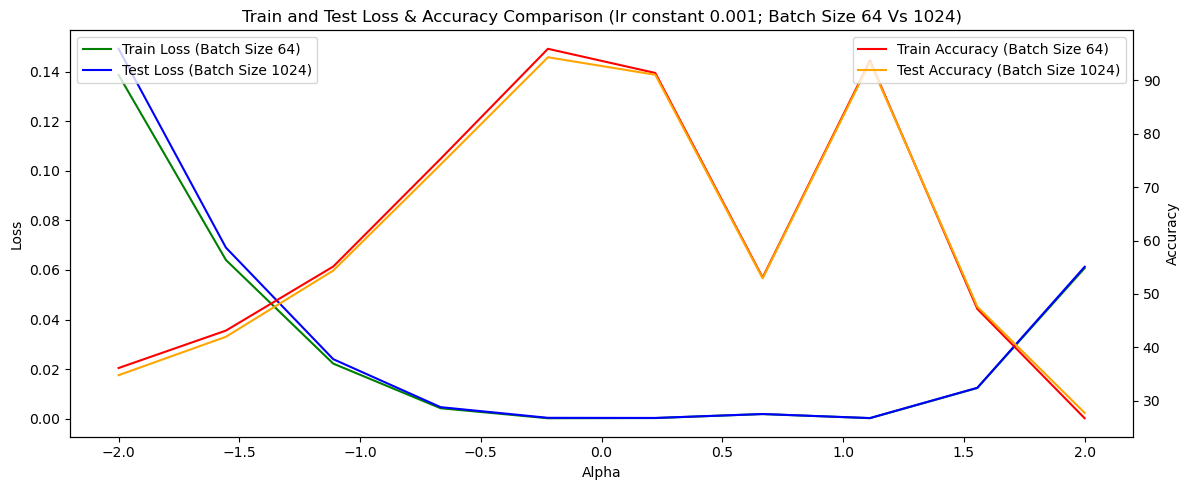

In [50]:
fig, ax1 = plt.subplots(figsize=(12, 5))

# Plot train and test loss on ax1
ax1.plot(np.linspace(-2, 2, 10), a_lr_train_loss_arr, color="green", label='Train Loss (Batch Size 64)')
ax1.plot(np.linspace(-2, 2, 10), a_lr_test_loss_arr, color="blue", label='Test Loss (Batch Size 1024)')
ax1.set_xlabel('Alpha')
ax1.set_ylabel('Loss', color='black')
ax1.legend(loc='upper left')

# Create a second y-axis sharing the same x-axis
ax2 = ax1.twinx()

# Plot train and test accuracy on ax2
ax2.plot(np.linspace(-2, 2, 10), a_lr_train_acc_arr,  color="red", label='Train Accuracy (Batch Size 64)')
ax2.plot(np.linspace(-2, 2, 10), a_lr_test_acc_arr,  color="orange", label='Test Accuracy (Batch Size 1024)')
ax2.set_ylabel('Accuracy', color='black')
ax2.set_title('Train and Test Loss & Accuracy Comparison (lr constant 0.001; Batch Size 64 Vs 1024)')
ax2.legend(loc='upper right')
plt.tight_layout()
plt.show()


In [48]:
#lr size const
training_DataLoader, testing_DataLoader = dataset_prep(64)
training_DataLoader1, testing_DataLoader1 = dataset_prep(1024)
a_lr1_train_loss_arr, a_lr1_train_acc_arr, a_lr1_test_loss_arr, a_lr1_test_acc_arr = interpolation(model_state["model_64_lr_0.01"], model_state["model_1024_lr_0.01"], training_DataLoader1, testing_DataLoader1)

theta - 0
theta - 1
theta - 2
theta - 3
theta - 4
theta - 5
theta - 6
theta - 7
theta - 8
theta - 9


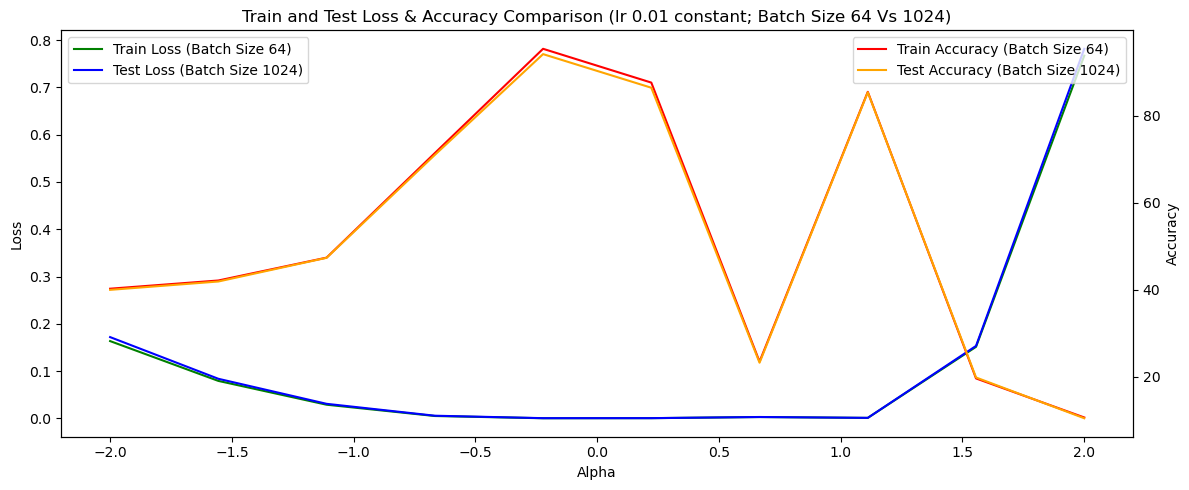

In [51]:
fig, ax1 = plt.subplots(figsize=(12, 5))

# Plot train and test loss on ax1
ax1.plot(np.linspace(-2, 2, 10), a_lr1_train_loss_arr, color="green", label='Train Loss (Batch Size 64)')
ax1.plot(np.linspace(-2, 2, 10), a_lr1_test_loss_arr, color="blue", label='Test Loss (Batch Size 1024)')
ax1.set_xlabel('Alpha')
ax1.set_ylabel('Loss', color='black')
ax1.legend(loc='upper left')

# Create a second y-axis sharing the same x-axis
ax2 = ax1.twinx()

# Plot train and test accuracy on ax2
ax2.plot(np.linspace(-2, 2, 10), a_lr1_train_acc_arr,  color="red", label='Train Accuracy (Batch Size 64)')
ax2.plot(np.linspace(-2, 2, 10), a_lr1_test_acc_arr,  color="orange", label='Test Accuracy (Batch Size 1024)')
ax2.set_ylabel('Accuracy', color='black')
ax2.set_title('Train and Test Loss & Accuracy Comparison (lr 0.01 constant; Batch Size 64 Vs 1024)')
ax2.legend(loc='upper right')
plt.tight_layout()
plt.show()
